In [1]:
# import needed libraries
import pandas as pd  # for data frame creation
import os  # for OS interface (to get/change directory)

In [2]:
#set working directory
os.getcwd()
os.chdir('/Users/caleb/Documents/Misc School Stuff/AIT580/Project Folder')
os.getcwd()
#import the data
df = pd.read_csv("vgsales.csv", sep=",")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


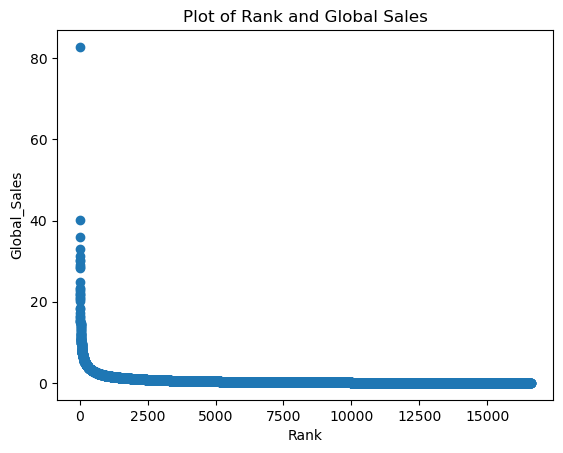

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#Rank Plot
plt.scatter(df['Rank'], df['Global_Sales'])
plt.title("Plot of Rank and Global Sales")

plt.xlabel("Rank")
plt.ylabel("Global_Sales")
plt.show()

In [5]:
#Creating Dataframe with only sales above 1 in global sales (1 Million)
df2 = df[df['Global_Sales'] > .99] 
print(df2)

      Rank                      Name Platform    Year         Genre  \
0        1                Wii Sports      Wii  2006.0        Sports   
1        2         Super Mario Bros.      NES  1985.0      Platform   
2        3            Mario Kart Wii      Wii  2008.0        Racing   
3        4         Wii Sports Resort      Wii  2009.0        Sports   
4        5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
...    ...                       ...      ...     ...           ...   
2076  2078          Wheel of Fortune      Wii  2010.0          Misc   
2077  2079           Disney Infinity      PS3  2013.0        Action   
2078  2080                Dark Souls     X360  2011.0  Role-Playing   
2079  2081        Puzzler Collection       DS  2008.0        Puzzle   
2080  2082       Jampack Winter 2000       PS  2000.0          Misc   

                        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                        Nintendo     41.49     29.02      3.77    

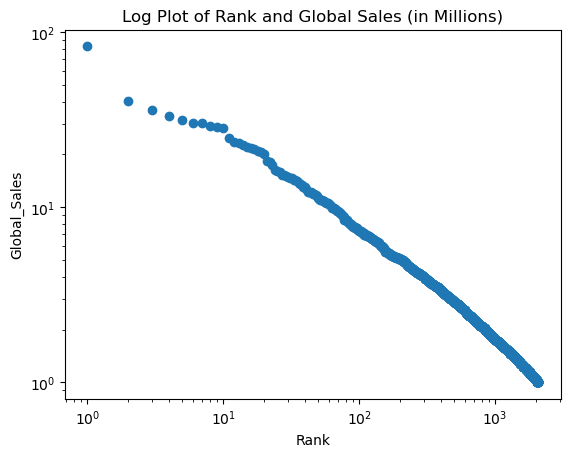

In [6]:
#Rank Plot
plt.yscale("log")
plt.xscale("log")
plt.scatter(df2['Rank'], df2['Global_Sales'])
plt.title("Log Plot of Rank and Global Sales (in Millions)")

plt.xlabel("Rank")
plt.ylabel("Global_Sales")
plt.show()

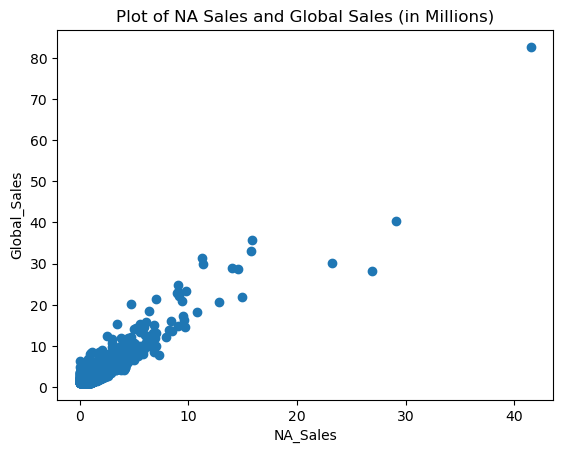

In [7]:
#Sales Versus NA Sales
#plt.yscale("log")
#plt.xscale("log")
plt.scatter(df2['NA_Sales'], df2['Global_Sales'])
plt.title("Plot of NA Sales and Global Sales (in Millions)")

plt.xlabel("NA_Sales")
plt.ylabel("Global_Sales")
plt.show()

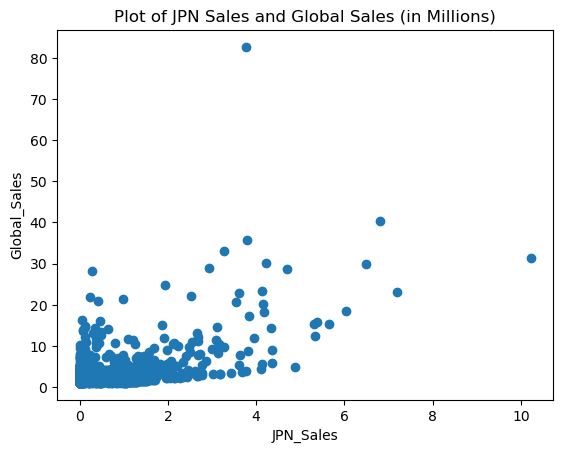

In [8]:
#Sales Versus JPN Sales
plt.scatter(df2['JP_Sales'], df2['Global_Sales'])
plt.title("Plot of JPN Sales and Global Sales (in Millions)")

plt.xlabel("JPN_Sales")
plt.ylabel("Global_Sales")
plt.show()

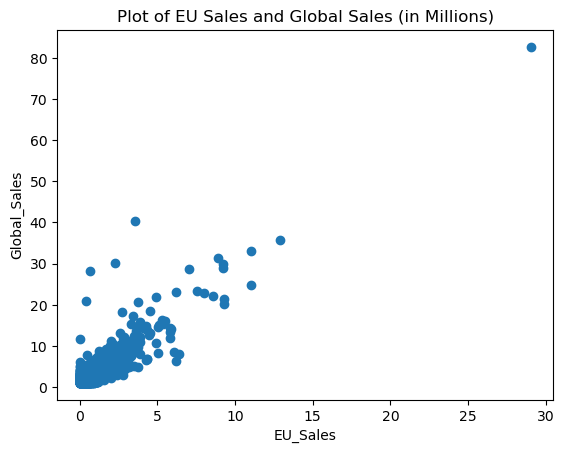

In [9]:
#Sales Versus EU Sales
plt.scatter(df2['EU_Sales'], df2['Global_Sales'])
plt.title("Plot of EU Sales and Global Sales (in Millions)")

plt.xlabel("EU_Sales")
plt.ylabel("Global_Sales")
plt.show()

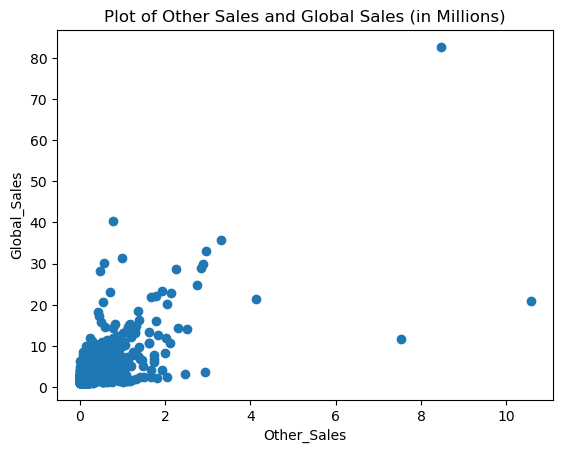

In [10]:
#Sales Versus Other Sales
plt.scatter(df2['Other_Sales'], df2['Global_Sales'])
plt.title("Plot of Other Sales and Global Sales (in Millions)")
plt.xlabel("Other_Sales")
plt.ylabel("Global_Sales")
plt.show()

In [11]:
from scipy.stats import pearsonr
#Pearson's Coeeficients Checks
corr, _ = pearsonr(df2['Global_Sales'], df2['NA_Sales'])
print('Pearsons correlation for NA: %.3f' % corr)
corr, _ = pearsonr(df2['Global_Sales'], df2['JP_Sales'])
print('Pearsons correlation for JP: %.3f' % corr)
corr, _ = pearsonr(df2['Global_Sales'], df2['EU_Sales'])
print('Pearsons correlation for EU: %.3f' % corr)
corr, _ = pearsonr(df2['Global_Sales'], df2['Other_Sales'])
print('Pearsons correlation for Other: %.3f' % corr)

Pearsons correlation for NA: 0.925
Pearsons correlation for JP: 0.567
Pearsons correlation for EU: 0.876
Pearsons correlation for Other: 0.684


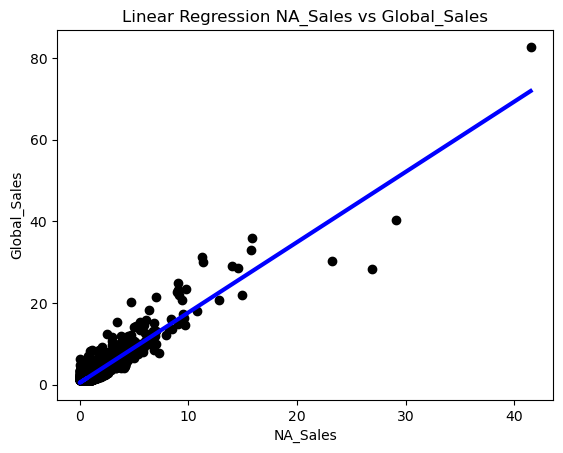

R2 Score 85.57557504773716 %


In [12]:
#Regression Analysis for same things
#Setting up Length of df2
from sklearn import datasets, linear_model
length = len(df2.index)
#NA_Sales v.s. Global_Sales
x = df2.NA_Sales.values
y = df2.Global_Sales.values
x = x.reshape(length, 1)
y = y.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
plt.xlabel('NA_Sales') 
plt.ylabel('Global_Sales') 
  
# displaying the title
plt.title("Linear Regression NA_Sales vs Global_Sales")
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

r2_score = regr.score(x,y)
print('R2 Score', r2_score*100,'%')

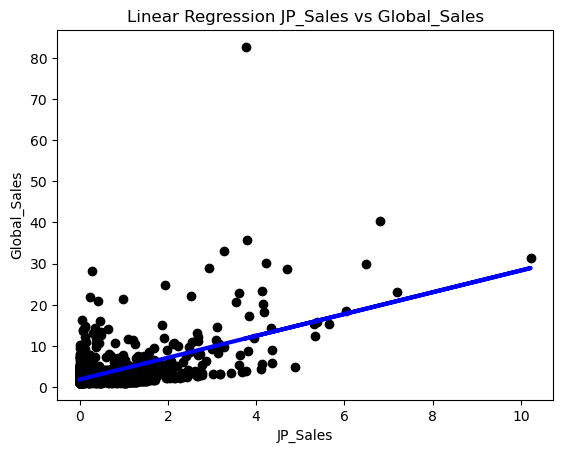

R2 Score 32.17141682362444 %


In [13]:
#JP_Sales v.s. Global_Sales
x = df2.JP_Sales.values
y = df2.Global_Sales.values
x = x.reshape(length, 1)
y = y.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
plt.xlabel('JP_Sales') 
plt.ylabel('Global_Sales') 
  
# displaying the title
plt.title("Linear Regression JP_Sales vs Global_Sales")
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

r2_score = regr.score(x,y)
print('R2 Score', r2_score*100,'%')

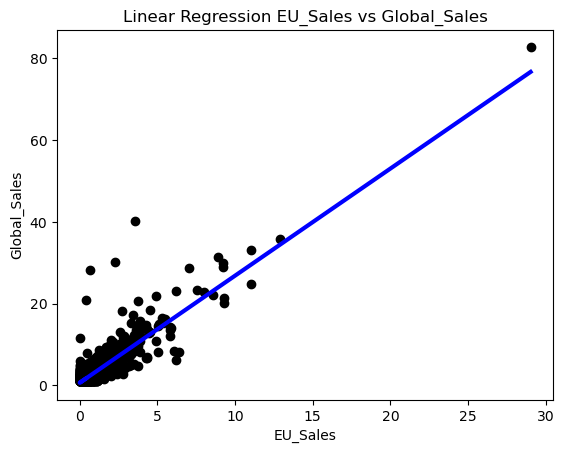

R2 Score 76.65383493136974 %


In [14]:
#EU_Sales v.s. Global_Sales
x = df2.EU_Sales.values
y = df2.Global_Sales.values
x = x.reshape(length, 1)
y = y.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
plt.xlabel('EU_Sales') 
plt.ylabel('Global_Sales') 
  
# displaying the title
plt.title("Linear Regression EU_Sales vs Global_Sales")
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

r2_score = regr.score(x,y)
print('R2 Score', r2_score*100,'%')

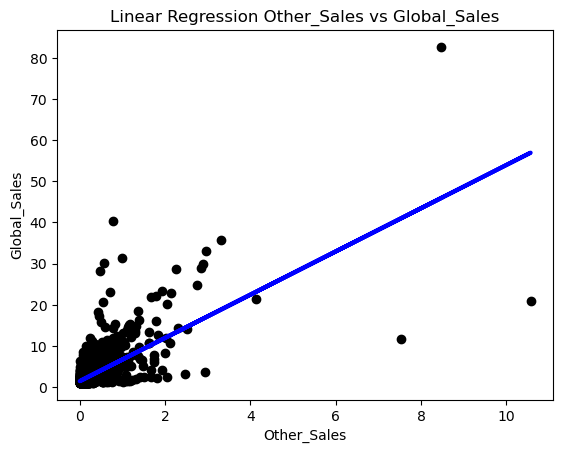

R2 Score 46.76868221259911 %


In [15]:
#Other_Sales v.s. Global_Sales
x = df2.Other_Sales.values
y = df2.Global_Sales.values
x = x.reshape(length, 1)
y = y.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
plt.xlabel('Other_Sales') 
plt.ylabel('Global_Sales') 
  
# displaying the title
plt.title("Linear Regression Other_Sales vs Global_Sales")
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

r2_score = regr.score(x,y)
print('R2 Score', r2_score*100,'%')

In [21]:
#Creating Dataframe with only sales above 1 in global sales (1 Million)
df3 = df[df['JP_Sales'] > 3.76] 
df3.sort_values(by=['JP_Sales'], ascending=False)
print(df3, len(df3.index))

     Rank                                            Name Platform    Year  \
0       1                                      Wii Sports      Wii  2006.0   
1       2                               Super Mario Bros.      NES  1985.0   
2       3                                  Mario Kart Wii      Wii  2008.0   
4       5                        Pokemon Red/Pokemon Blue       GB  1996.0   
5       6                                          Tetris       GB  1989.0   
6       7                           New Super Mario Bros.       DS  2006.0   
8       9                       New Super Mario Bros. Wii      Wii  2009.0   
11     12                                   Mario Kart DS       DS  2005.0   
12     13                     Pokemon Gold/Pokemon Silver       GB  1999.0   
19     20    Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   
20     21                   Pokemon Diamond/Pokemon Pearl       DS  2006.0   
21     22                                Super Mario Land       